In [2]:
import torch, json
from math import floor
import pandas as pd
import numpy as np

from FileManager.dataManager import dataManager
from AnalyzeTools.models import autoregressive_integrated_moving_average, linear_regression, support_vector_regression, random_forest, gradient_boosting
from AnalyzeTools.prepare import data_split, model_eval, pathForSavingModels
from AnalyzeTools.preprocess import preprocessData, removeOutliers
from AnalyzeTools.superModels import DEEPAR, TFT, RNN

c:\Users\zyf13\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Global seed set to 123


In [3]:
period = 'Day'
future_step = 1
params_path = f'./Models'

product_object = json.load(open("./File information.json", "r", encoding='utf8'))

all_experiments= []
for product in product_object.keys():
    for raw_file_name in  product_object[product].keys():
        for product_type in product_object[product][raw_file_name]['product_types']:
            for target in product_object[product][raw_file_name]['targets']:
                all_experiments.append([product, raw_file_name, product_type, target])

In [4]:
n = 15
experiment = all_experiments[n]
product, raw_file_name, product_type, target = experiment
print(f"Product: {product}\nRaw file name: {raw_file_name}\nProduct_type: {product_type}\ntarget: {target}")

Product: beef
Raw file name: 축산유통정보 - 소비자가격
Product_type: 4401
target: DLPC


In [5]:
df, product_and_product_type, product_attribute = dataManager(raw_file_name, product, product_type, target)

if len(df) == 0:
    raise ValueError("No data!")

Number of outliers detected: -38
Number of normal samples detected: 1204


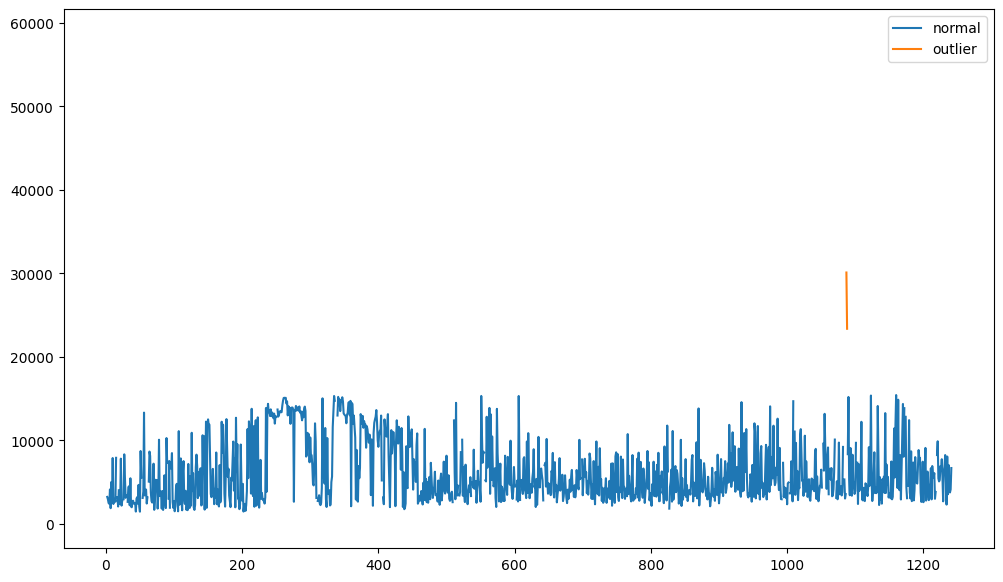

In [6]:
data = df.copy()

data = removeOutliers(data, 0, target)

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

plot_template = dict(
    layout=go.Layout({
        'font_size': 18,
        'xaxis_title_font_size': 18,
        'yaxis_title_font_size': 18,
    })
)

fig = go.Figure()
fig.add_scatter(
    x=data[(data['date'] >= '2022-01-01') & (data['date'] <= '2022-10-01')]['date'].values, 
    y=data[(data['date'] >= '2022-01-01') & (data['date'] <= '2022-10-01')]['DLPC'].values, 
    mode='lines', 
    name=''
)
fig.update_layout(
    template=plot_template,
    xaxis_title="일자",
    yaxis_title="수입소고기 소매가격", 
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    width=1000,
    height=600
)
fig.show()

In [10]:
df, input_features = preprocessData(df, 'date', target, 'Day')
test_size = 0.2

There are too few features in the data. The raw data features will be used.
Too few features to filter!

-->Final features:
  []


In [ ]:
df = removeOutliers(df, test_size, target)

train_x_axis = df['date'][:-1*floor(len(df) * test_size)].values if type(test_size) == float else df['date'][:-1*test_size]
predictions_x_axis = df['date'][-1*floor(len(df) * test_size):].values if type(test_size) == float else df['date'][-1*test_size:]